In [ ]:
# Check GPU
!nvidia-smi

Sat Oct  4 08:57:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random
import seaborn as sns
import base64
import cv2
import shutil
import os

In [ ]:
!pip install mediapipe opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found exi

In [ ]:

import mediapipe as mp
from google.colab.output import eval_js
from IPython.display import display, Javascript
import mediapipe as mp
from IPython.display import display, Image as IPyImage
from google.colab import output


In [ ]:
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)

TensorFlow version: 2.19.0
NumPy version: 2.0.2


In [ ]:
seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
!git clone https://github.com/jisharajr/Bharatanatyam-Mudra-Dataset.git

Cloning into 'Bharatanatyam-Mudra-Dataset'...
remote: Enumerating objects: 24938, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 24938 (delta 3), reused 1 (delta 0), pack-reused 24929 (from 1)
Receiving objects: 100% (24938/24938), 702.65 MiB | 28.51 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (28433/28433), done.


In [ ]:
DATASET_PATH = '/content/Bharatanatyam-Mudra-Dataset'

In [ ]:
for root, dirs, files in os.walk(DATASET_PATH):
    for d in dirs:
        new_name = d.split("(")[0].strip()  # remove anything after "("
        if new_name != d:
            os.rename(os.path.join(root, d), os.path.join(root, new_name))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
extra_data_path1 = "/content/drive/MyDrive/mudra/mudra_dataset"
extra_data_path2="/content/drive/MyDrive/mudra/single mudra"

target_path = DATASET_PATH

# Copy all subfolders (mudra classes) into dataset
shutil.copytree(extra_data_path1, target_path, dirs_exist_ok=True)

'/content/Bharatanatyam-Mudra-Dataset'

In [ ]:
katakamukha_target = os.path.join(DATASET_PATH, "Katakamukha")
os.makedirs(katakamukha_target, exist_ok=True)

for sub in ["Katakamukha_1", "Katakamukha_2", "Katakamukha_3"]:
    sub_path = os.path.join(DATASET_PATH, sub)
    if os.path.exists(sub_path):
        for f in os.listdir(sub_path):
            shutil.move(os.path.join(sub_path, f), katakamukha_target)
        shutil.rmtree(sub_path)

# --- 2. Merge Mushthi into Mushti ---
mushti_target = os.path.join(DATASET_PATH, "Mushti")
os.makedirs(mushti_target, exist_ok=True)

for sub in ["Mushthi"]:
    sub_path = os.path.join(DATASET_PATH, sub)
    if os.path.exists(sub_path):
        for f in os.listdir(sub_path):
            shutil.move(os.path.join(sub_path, f), mushti_target)
        shutil.rmtree(sub_path)

# --- 3. Merge Shukatunda into Shukatundam ---
shukatundam_target = os.path.join(DATASET_PATH, "Shukatundam")
os.makedirs(shukatundam_target, exist_ok=True)

for sub in ["Shukatunda"]:
    sub_path = os.path.join(DATASET_PATH, sub)
    if os.path.exists(sub_path):
        for f in os.listdir(sub_path):
            shutil.move(os.path.join(sub_path, f), shukatundam_target)
        shutil.rmtree(sub_path)

print("✅ Dataset folders merged successfully!")

✅ Dataset folders merged successfully!


In [ ]:
source_path = "/content/Bharatanatyam-Mudra-Dataset"
save_path = "/content/drive/MyDrive/mudra/final_dataset"

# copy merged dataset into Drive
shutil.copytree(source_path, save_path, dirs_exist_ok=True)

print("✅ Dataset saved to Google Drive at:", save_path)

✅ Dataset saved to Google Drive at: /content/drive/MyDrive/mudra/final_dataset


In [ ]:
# 2. Use ImageDataGenerator or tf.data to load images
IMG_SIZE = (128, 128)   # you can use 224 for MobileNet/ResNet etc
BATCH_SIZE = 16

In [ ]:
# Load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int"
)

Found 28716 files belonging to 50 classes.
Using 22973 files for training.
Found 28716 files belonging to 50 classes.
Using 5743 files for validation.


In [ ]:
# Save class names BEFORE cache/prefetch
class_names = train_ds.class_names
num_classes = len(class_names)
class_names

['Alapadmam',
 'Anjali',
 'Aralam',
 'Ardhachandran',
 'Ardhapathaka',
 'Berunda',
 'Bramaram',
 'Chakra',
 'Chandrakala',
 'Chaturam',
 'Garuda',
 'Hamsapaksha',
 'Hamsasyam',
 'Kangulam',
 'Kapith',
 'Kapotham',
 'Karkatta',
 'Kartariswastika',
 'Kartrimukha',
 'Katakamukha',
 'Katakavardhana',
 'Katrimukha',
 'Khatva',
 'Kilaka',
 'Kurma',
 'Matsya',
 'Mayura',
 'Mrigasirsha',
 'Mukulam',
 'Mushti',
 'Nagabandha',
 'Padmakosha',
 'Pasha',
 'Pathaka',
 'Pushpaputa',
 'Sakata',
 'Samputa',
 'Sandamsha',
 'Sarpasirsha',
 'Shanka',
 'Shivalinga',
 'Shukatundam',
 'Sikharam',
 'Simhamukham',
 'Suchi',
 'Swastikam',
 'Tamarachudam',
 'Tripathaka',
 'Trishulam',
 'Varaha']

In [ ]:
class_names=['Alapadmam',
 'Anjali',
 'Aralam',
 'Ardhachandran',
 'Ardhapathaka',
 'Berunda',
 'Bramaram',
 'Chakra',
 'Chandrakala',
 'Chaturam',
 'Garuda',
 'Hamsapaksha',
 'Hamsasyam',
 'Kangulam',
 'Kapith',
 'Kapotham',
 'Karkatta',
 'Kartariswastika',
 'Kartrimukha',
 'Katakamukha',
 'Katakavardhana',
 'Katrimukha',
 'Khatva',
 'Kilaka',
 'Kurma',
 'Matsya',
 'Mayura',
 'Mrigasirsha',
 'Mukulam',
 'Mushti',
 'Nagabandha',
 'Padmakosha',
 'Pasha',
 'Pathaka',
 'Pushpaputa',
 'Sakata',
 'Samputa',
 'Sandamsha',
 'Sarpasirsha',
 'Shanka',
 'Shivalinga',
 'Shukatundam',
 'Sikharam',
 'Simhamukham',
 'Suchi',
 'Swastikam',
 'Tamarachudam',
 'Tripathaka',
 'Trishulam',
 'Varaha']

In [ ]:
# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
AUTOTUNE

-1

In [ ]:
# Enhanced MobileNetV3Large with fine-tuning
base_model = tf.keras.applications.MobileNetV3Large(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet",
    include_preprocessing=True
)

# Unfreeze last layers for fine-tuning
base_model.trainable = False
# Let's unfreeze the last 20 layers
for layer in base_model.layers[-20:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

/usr/local/lib/python3.12/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

In [ ]:
from tensorflow.keras import layers, Model, optimizers
# Functional model
inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = Model(inputs, outputs)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 4, 4, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       492,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        12,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,635,634 (13.87 MB)

 Trainable params: 1,584,546 (6.04 MB)

 Non-trainable params: 2,051,088 (7.82 MB)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint(
    "best_mudra_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

early_stop= EarlyStopping(
    monitor="val_accuracy",
    patience=8,  # Reduced patience for faster training
    mode="max",
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

In [ ]:
# Train without steps_per_epoch (let TF handle it)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=40,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

Epoch 1/40
1430/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5316 - loss: 2.0615
Epoch 1: val_accuracy improved from -inf to 0.98468, saving model to best_mudra_model.keras
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step - accuracy: 0.5329 - loss: 2.0562 - val_accuracy: 0.9847 - val_loss: 0.0675 - learning_rate: 1.0000e-04
Epoch 2/40
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9880 - loss: 0.1079
Epoch 2: val_accuracy improved from 0.98468 to 0.98938, saving model to best_mudra_model.keras
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9880 - loss: 0.1079 - val_accuracy: 0.9894 - val_loss: 0.0515 - learning_rate: 1.0000e-04
Epoch 3/40
1433/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9939 - loss: 0.0445
Epoch 3: val_accuracy did not improve from 0.98938
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9939 - loss: 0.0445 - val_accuracy: 0.9894 - val_loss: 0.0518 - learning_rate: 1.0000e-04
Epoch 4/40
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

In [ ]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_ds)
print(f"\nValidation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss * 100:.2f}%")

359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9918 - loss: 0.0403

Validation Accuracy: 99.08%
Validation Loss: 5.33%


In [ ]:
# ---- Get predictions and labels ----
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_probs = model.predict(val_ds, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

359/359 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step


In [ ]:
# ---- Classification report ----
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))



Classification Report:

                 precision    recall  f1-score   support

      Alapadmam       1.00      0.98      0.99       103
         Anjali       1.00      1.00      1.00        97
         Aralam       0.96      1.00      0.98       124
  Ardhachandran       1.00      0.99      0.99        92
   Ardhapathaka       0.96      0.99      0.98       100
        Berunda       1.00      1.00      1.00       115
       Bramaram       1.00      1.00      1.00       104
         Chakra       1.00      1.00      1.00       137
    Chandrakala       0.99      0.99      0.99        86
       Chaturam       0.98      0.95      0.97       109
         Garuda       0.99      1.00      1.00       113
    Hamsapaksha       0.96      0.99      0.98       110
      Hamsasyam       0.99      0.96      0.97       118
       Kangulam       0.99      0.98      0.99       103
         Kapith       1.00      1.00      1.00       120
       Kapotham       1.00      1.00      1.00       117
     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


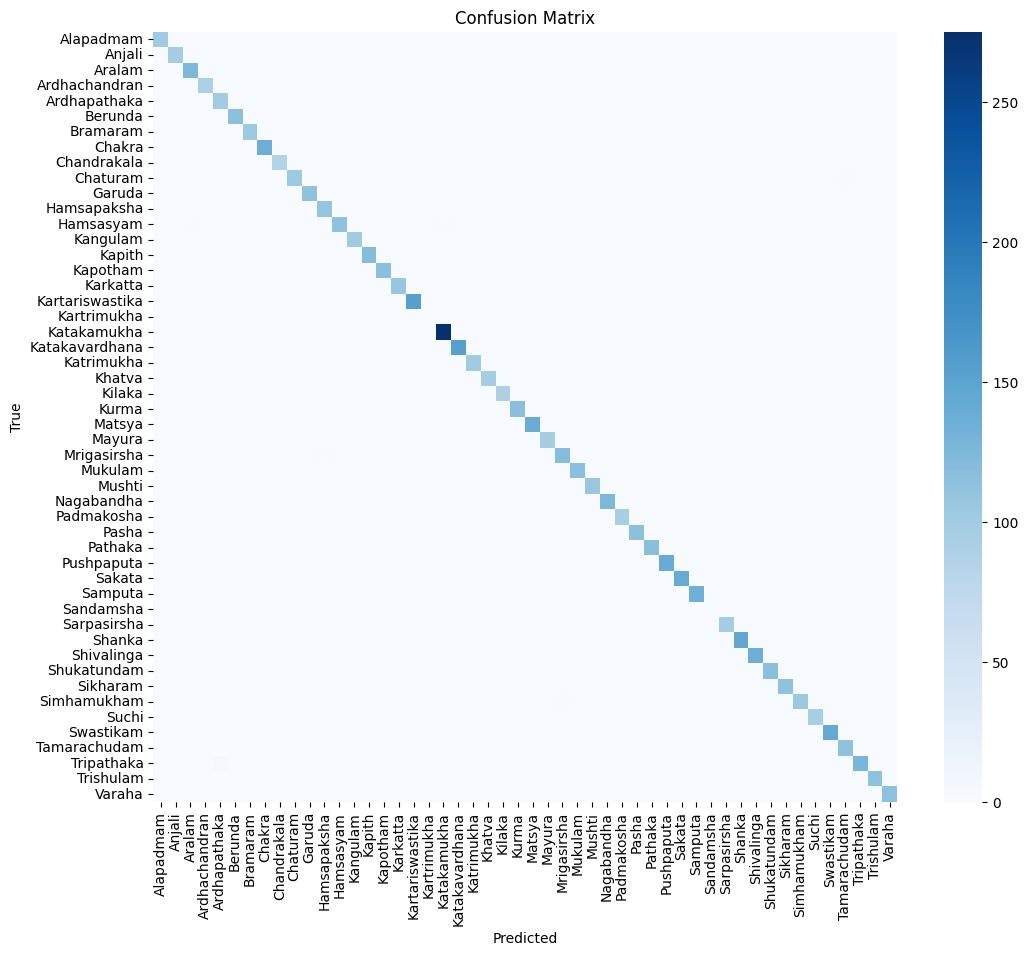

In [ ]:
# ---- Confusion matrix ----
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

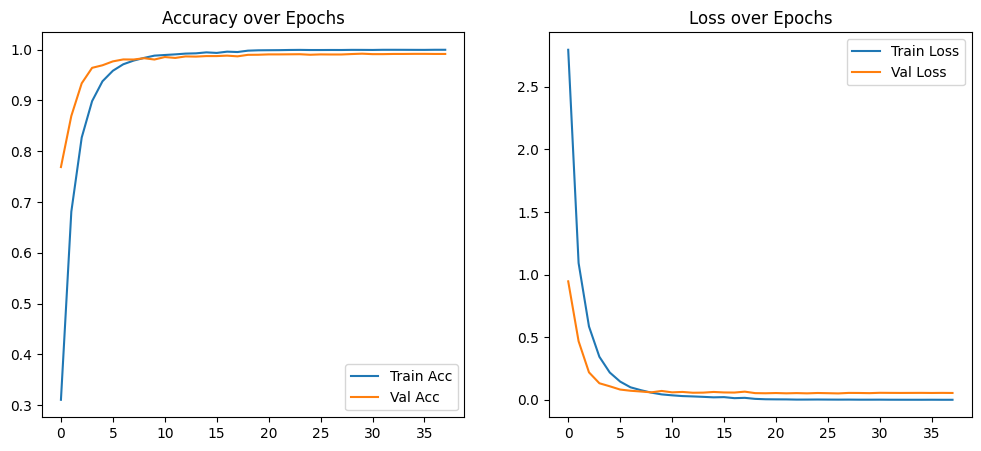

In [ ]:
# ---- Training curves ----
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Acc')
    plt.plot(epochs_range, val_acc, label='Val Acc')
    plt.legend()
    plt.title('Accuracy over Epochs')

    # Loss curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend()
    plt.title('Loss over Epochs')
    plt.show()

plot_history(history)

In [ ]:
# Save
model.save("best_mudra_model.keras")  # use .keras extension

In [ ]:
# Load later
from tensorflow.keras.models import load_model
model = load_model("best_mudra_model.keras")

In [ ]:
from google.colab import files
from PIL import Image

uploaded = files.upload()  # will open a file selector in Colab
img_path = list(uploaded.keys())[0]  # get the uploaded file name

Saving arala.jpg to arala.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Top-3 Predictions:
Aralam: 0.33
Tripathaka: 0.22
Ardhachandran: 0.08


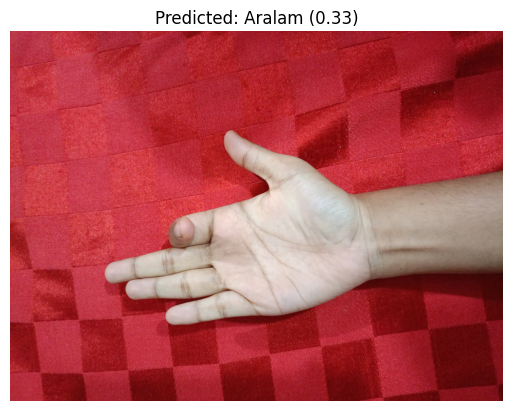

In [ ]:
# Load and preprocess uploaded image
img = Image.open(img_path).convert("RGB")
img = img.resize(IMG_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # batch of 1

# Predict
pred_probs = model.predict(img_array)
top3_indices = np.argsort(pred_probs[0])[-3:][::-1]  # top-3 indices
top3_classes = [class_names[i] for i in top3_indices]
top3_probs = pred_probs[0][top3_indices]

# Print top-3 results
print("Top-3 Predictions:")
for cls, prob in zip(top3_classes, top3_probs):
    print(f"{cls}: {prob:.2f}")

# Show the image with top-1 prediction as title
plt.imshow(Image.open(img_path))
plt.axis("off")
plt.title(f"Predicted: {top3_classes[0]} ({top3_probs[0]:.2f})")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Top-3 Predictions:
Sakata: 0.46
Shanka: 0.29
Katakavardhana: 0.08


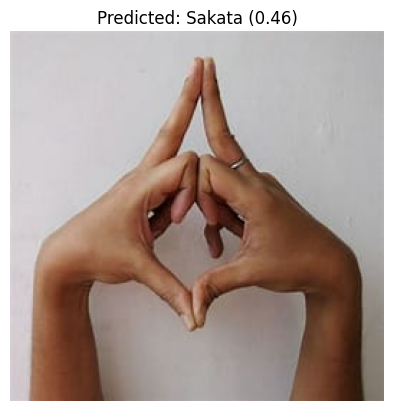

In [ ]:
# Load and preprocess uploaded image
img = Image.open(img_path).convert("RGB")
img = img.resize(IMG_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # batch of 1

# Predict
pred_probs = model.predict(img_array)
top3_indices = np.argsort(pred_probs[0])[-3:][::-1]  # top-3 indices
top3_classes = [class_names[i] for i in top3_indices]
top3_probs = pred_probs[0][top3_indices]

# Print top-3 results
print("Top-3 Predictions:")
for cls, prob in zip(top3_classes, top3_probs):
    print(f"{cls}: {prob:.2f}")

# Show the image with top-1 prediction as title
plt.imshow(Image.open(img_path))
plt.axis("off")
plt.title(f"Predicted: {top3_classes[0]} ({top3_probs[0]:.2f})")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Top-3 Predictions:
Hamsapaksha(1): 0.70
Suchi(1): 0.26
Chaturam(1): 0.03


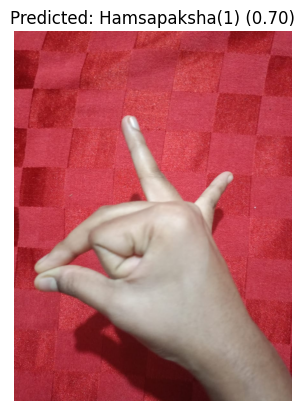

In [ ]:
# Load and preprocess uploaded image
img = Image.open(img_path).convert("RGB")
img = img.resize(IMG_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # batch of 1

# Predict
pred_probs = model.predict(img_array)
top3_indices = np.argsort(pred_probs[0])[-3:][::-1]  # top-3 indices
top3_classes = [class_names[i] for i in top3_indices]
top3_probs = pred_probs[0][top3_indices]

# Print top-3 results
print("Top-3 Predictions:")
for cls, prob in zip(top3_classes, top3_probs):
    print(f"{cls}: {prob:.2f}")

# Show the image with top-1 prediction as title
plt.imshow(Image.open(img_path))
plt.axis("off")
plt.title(f"Predicted: {top3_classes[0]} ({top3_probs[0]:.2f})")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predicted Mudra: Pathaka(1) (Confidence: 1.00)


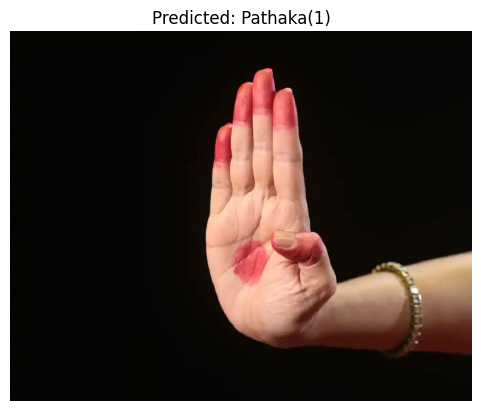

In [ ]:
# Load and preprocess uploaded image
img = Image.open(img_path).convert("RGB")
img = img.resize(IMG_SIZE)  # resize to model input
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # make batch of 1

# Predict
pred_probs = model.predict(img_array)
pred_class = np.argmax(pred_probs, axis=1)[0]
confidence = np.max(pred_probs)

print(f"Predicted Mudra: {class_names[pred_class]} (Confidence: {confidence:.2f})")

# Show the image
plt.imshow(Image.open(img_path))
plt.axis("off")
plt.title(f"Predicted: {class_names[pred_class]}")
plt.show()

In [ ]:
uploaded = files.upload()  # will open a file selector in Colab
img_path = list(uploaded.keys())[0]

Saving Chandrakala_105.jpg to Chandrakala_105.jpg


In [ ]:
img = Image.open(img_path).convert("RGB")
img = img.resize(IMG_SIZE)  # resize to model input
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # make batch of 1

# Predict
pred_probs = model.predict(img_array)
pred_class = np.argmax(pred_probs, axis=1)[0]
confidence = np.max(pred_probs)

print(f"Predicted Mudra: {class_names[pred_class]} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Mudra: Chandrakala(1) (Confidence: 1.00)


In [ ]:
uploaded = files.upload()  # will open a file selector in Colab
img_path = list(uploaded.keys())[0]

Saving anjali.jpg to anjali.jpg


In [ ]:
img = Image.open(img_path).convert("RGB")
img = img.resize(IMG_SIZE)  # resize to model input
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # make batch of 1

# Predict
pred_probs = model.predict(img_array)
pred_class = np.argmax(pred_probs, axis=1)[0]
confidence = np.max(pred_probs)

print(f"Predicted Mudra: {class_names[pred_class]} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Mudra: Anjali(1) (Confidence: 1.00)


# Assessment

In [ ]:
mp_hands = mp.solutions.hands
IMG_SIZE=(128,128)

In [ ]:
# JS function to open webcam and capture a photo
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize iframe
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture button
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))

    binary = base64.b64decode(data.split(',')[1])
    img = cv2.imdecode(np.frombuffer(binary, np.uint8), cv2.IMREAD_COLOR)
    cv2.imwrite(filename, img)
    return filename


In [ ]:
def predict_mudra(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=1,
        min_detection_confidence=0.5
    ) as hands:
        results = hands.process(img_rgb)

        if not results.multi_hand_landmarks:
            print("❌ No hand detected!")
            return None

        # Extract bounding box
        h, w, _ = img.shape
        hand_landmarks = results.multi_hand_landmarks[0]
        x_coords = [lm.x for lm in hand_landmarks.landmark]
        y_coords = [lm.y for lm in hand_landmarks.landmark]
        xmin, xmax = int(min(x_coords) * w), int(max(x_coords) * w)
        ymin, ymax = int(min(y_coords) * h), int(max(y_coords) * h)

        # Crop hand region safely
        xmin, ymin = max(0, xmin), max(0, ymin)
        xmax, ymax = min(w, xmax), min(h, ymax)
        hand_img = img[ymin:ymax, xmin:xmax]

        if hand_img.size == 0:
            print("❌ Cropping failed!")
            return None

        # Preprocess for model
        hand_img = cv2.resize(hand_img, IMG_SIZE)
        hand_img = hand_img / 255.0
        hand_img = np.expand_dims(hand_img, axis=0)

        # Predict
        preds = model.predict(hand_img)
        class_id = np.argmax(preds[0])
        confidence = np.max(preds[0])

        print(f"✅ Predicted Mudra: {class_names[class_id]} ({confidence:.2f})")
        return class_names[class_id]


In [ ]:
# Capture one photo from webcam
img_path = take_photo()
print("Saved image:", img_path)
predict_mudra(img_path)

<IPython.core.display.Javascript object>

Saved image: photo.jpg


In [ ]:
!pip install ultralytics supervision roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
 

In [ ]:
from ultralytics import YOLO
from google.colab import files
from PIL import Image
from roboflow import Roboflow
import cv2
from google.colab import output
from IPython.display import display, Javascript, Image as IPyImage
import base64
from google.colab.patches import cv2_imshow


In [ ]:
rf = Roboflow(api_key="pI7HGdrHPBQ0lOv7E8Jj")

In [ ]:
# Download YOLOv8 hand detector from Roboflow
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n-hand.pt" -o yolov8n-hand.pt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100     9  100     9    0     0     39      0 --:--:-- --:--:-- --:--:--    39


UnpicklingError: could not find MARK

In [ ]:
hand_model = YOLO("yolov8n.pt") # general hand detection

In [ ]:
# Download pretrained hand detection weights (Roboflow or custom)
!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt -O yolov8_hand.pt

# Load model
hand_detector = YOLO("yolov8_hand.pt")

--2025-10-04 09:09:27--  https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/732c503e-9fcb-4a82-be7f-106baafbda15?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-04T10%3A03%3A49Z&rscd=attachment%3B+filename%3Dyolov8n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-04T09%3A03%3A33Z&ske=2025-10-04T10%3A03%3A49Z&sks=b&skv=2018-11-09&sig=XsIvSE3Tfi2JJr2Dm8Q7QVZ0G2lp9Y8SedR1TtHsiUs%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1OTU2OTI2NywibmJmIjoxNzU5NTY4OTY3LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNvc

In [ ]:
mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=4,
                       min_detection_confidence=0.6,
                       min_tracking_confidence=0.5)


In [ ]:
# Utility: take photo in Colab

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            video.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = output.eval_js('takePhoto({})'.format(quality))
    binary = np.frombuffer(base64.b64decode(data.split(',')[1]), dtype=np.uint8)
    img = cv2.imdecode(binary, cv2.IMREAD_COLOR)
    cv2.imwrite(filename, img)
    return filename

In [ ]:
class_names

['Alapadmam',
 'Anjali',
 'Aralam',
 'Ardhachandran',
 'Ardhapathaka',
 'Berunda',
 'Bramaram',
 'Chakra',
 'Chandrakala',
 'Chaturam',
 'Garuda',
 'Hamsapaksha',
 'Hamsasyam',
 'Kangulam',
 'Kapith',
 'Kapotham',
 'Karkatta',
 'Kartariswastika',
 'Kartrimukha',
 'Katakamukha',
 'Katakavardhana',
 'Katrimukha',
 'Khatva',
 'Kilaka',
 'Kurma',
 'Matsya',
 'Mayura',
 'Mrigasirsha',
 'Mukulam',
 'Mushti',
 'Nagabandha',
 'Padmakosha',
 'Pasha',
 'Pathaka',
 'Pushpaputa',
 'Sakata',
 'Samputa',
 'Sandamsha',
 'Sarpasirsha',
 'Shanka',
 'Shivalinga',
 'Shukatundam',
 'Sikharam',
 'Simhamukham',
 'Suchi',
 'Swastikam',
 'Tamarachudam',
 'Tripathaka',
 'Trishulam',
 'Varaha']

In [ ]:
IMG_SIZE

(128, 128)

In [ ]:
# Finger confidence utility
def angle_to_conf(angle, finger_name='default'):
    if finger_name == 'Thumb':
        # Thumb: ~40° bent → 0%, ~160° straight → 100%
        return max(0, min(100, (angle - 40) / (160 - 40) * 100))
    else:
        # Other fingers: ~60° bent → 0%, ~180° straight → 100%
        return max(0, min(100, (angle - 60) / (180 - 60) * 100))

In [ ]:
def finger_angle(p1, p2, p3):
    """Return angle (in degrees) at p2 formed by p1–p2–p3"""
    a = np.array(p1)
    b = np.array(p2)
    c = np.array(p3)
    ba = a - b
    bc = c - b
    cos_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))


In [ ]:
# Detect hands + predict mudra
def detect_mudra(frame, model=None, class_names=None, IMG_SIZE=(224,224)):
    mp_hands = mp.solutions.hands
    mp_draw = mp.solutions.drawing_utils

    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.6
    ) as hands:

        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        h, w, _ = frame.shape

        # Hand counting
        num_hands = len(results.multi_hand_landmarks) if results.multi_hand_landmarks else 0
        print(f"🖐️ Number of hands detected: {num_hands}")

        if not results.multi_hand_landmarks:
            print("No hand detected!")
            return frame

        finger_joints = {
            "Thumb": [1, 2, 3, 4],
            "Index": [5, 6, 7, 8],
            "Middle": [9, 10, 11, 12],
            "Ring": [13, 14, 15, 16],
            "Little": [17, 18, 19, 20],
        }

        for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
            print(f"\n👉 Hand #{hand_no + 1}")
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Convert normalized landmarks → pixel coordinates
            landmarks = [(int(lm.x*w), int(lm.y*h)) for lm in hand_landmarks.landmark]

            # Finger confidence
            finger_scores = {}
            for name, idx in finger_joints.items():
                try:
                    ang = finger_angle(landmarks[idx[0]], landmarks[idx[1]], landmarks[idx[2]])
                    finger_scores[name] = round(angle_to_conf(ang, name), 2)
                except:
                    finger_scores[name] = 0

            print("🔹 Finger confidence scores:")
            for f, c in finger_scores.items():
                print(f"  {f}: {c}%")

            # Optional: Mudra prediction
            if model is not None and class_names is not None:
                # Get bounding box
                x_coords = [p[0] for p in landmarks]
                y_coords = [p[1] for p in landmarks]
                x1, y1, x2, y2 = min(x_coords), min(y_coords), max(x_coords), max(y_coords)
                hand_crop = frame[y1:y2, x1:x2]
                if hand_crop.size > 0:
                    hand_resized = cv2.resize(hand_crop, IMG_SIZE)
                    hand_array = np.expand_dims(hand_resized, axis=0).astype(np.float32)/255.0
                    pred = model.predict(hand_array)
                    label = class_names[np.argmax(pred)]
                    confidence = np.max(pred)*100
                    cv2.putText(frame, f"{label} {confidence:.1f}%", (x1, y1-10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
    return frame


In [ ]:
def detect_and_classify(frame):
    # Detect hands
    results = hand_model.predict(frame, verbose=False)

    for r in results:
        for box in r.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box[:4])
            hand = frame[y1:y2, x1:x2]

            if hand.size == 0:
                continue

            # Resize & normalize
            hand_resized = cv2.resize(hand, (224, 224))
            hand_array = np.expand_dims(hand_resized, axis=0).astype(np.float32)/255.0

            # Predict mudra
            pred = model.predict(hand_array)
            label = class_names[np.argmax(pred)]
            confidence = np.max(pred)*100

            # Draw rectangle and label
            cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(frame, f"{label} {confidence:.1f}%", (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
    return frame


In [ ]:
def detect_mudra(frame):
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(img_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Draw hand landmarks & connections
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Get bounding box
            h, w, _ = frame.shape
            x_coords = [int(lm.x * w) for lm in hand_landmarks.landmark]
            y_coords = [int(lm.y * h) for lm in hand_landmarks.landmark]
            x1, y1, x2, y2 = min(x_coords), min(y_coords), max(x_coords), max(y_coords)

            # Crop and resize
            hand_crop = frame[y1:y2, x1:x2]
            if hand_crop.size == 0:
                continue
            hand_resized = cv2.resize(hand_crop, IMG_SIZE)
            hand_array = np.expand_dims(hand_resized, axis=0).astype(np.float32)/255.0

            # Predict mudra
            pred = model.predict(hand_array)
            label = class_names[np.argmax(pred)]
            confidence = np.max(pred)*100

            # Draw label
            cv2.putText(frame, f"{label} {confidence:.1f}%", (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
    return frame

<IPython.core.display.Javascript object>

🖐️ Number of hands detected: 1

👉 Hand #1
🔹 Finger confidence scores:
  Thumb: 100%
  Index: 90.97%
  Middle: 0.97%
  Ring: 80.74%
  Little: 98.22%


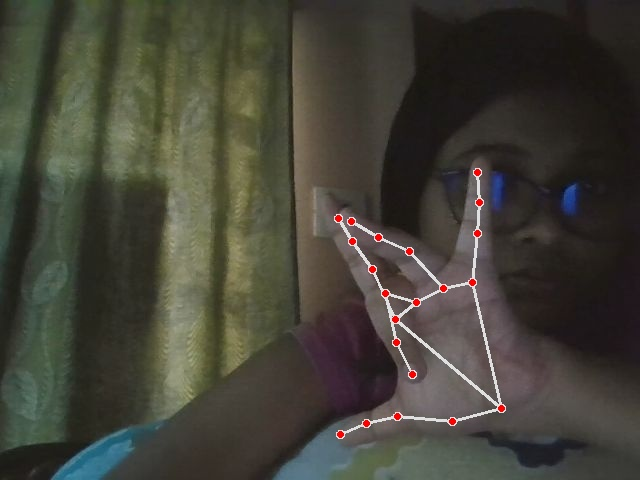

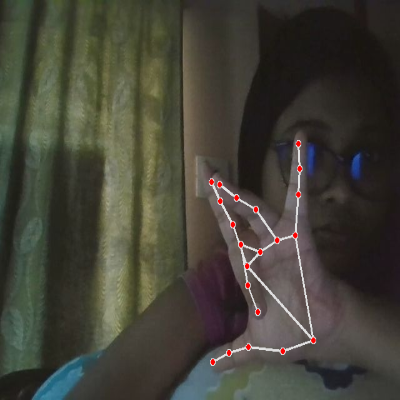

In [ ]:
img_path = take_photo()  # capture from webcam
frame = cv2.imread(img_path)

# If you have a trained model:
# frame = detect_mudra(frame, model=model, class_names=class_names)
# Otherwise, skip model prediction:
frame = detect_mudra(frame)

# Show annotated image
_, encoded_img = cv2.imencode('.jpg', frame)
display(IPyImage(data=encoded_img.tobytes()))
cv2_imshow(cv2.resize(frame, (400,400)))

# end

In [ ]:
img_path = take_photo()  # Capture frame
frame = cv2.imread(img_path)
frame = detect_mudra(frame)

# Display in Colab
_, encoded_img = cv2.imencode('.jpg', frame)
display(IPyImage(data=encoded_img.tobytes()))

<IPython.core.display.Javascript object>

ValueError: _graph is None in SolutionBase

In [ ]:
# For a finger fully bent (≈ 60°) → 0%
# Fully straight (≈ 180°) → 100%
def angle_to_conf(angle):
    return max(0, min(100, (angle - 60) / (180 - 60) * 100))

🖐️ Number of hands detected: 1

👉 Hand #1
🔹 Finger confidence scores:
  Thumb: 99.34%
  Index: 89.37%
  Middle: 99.76%
  Ring: 99.04%
  Little: 99.59%


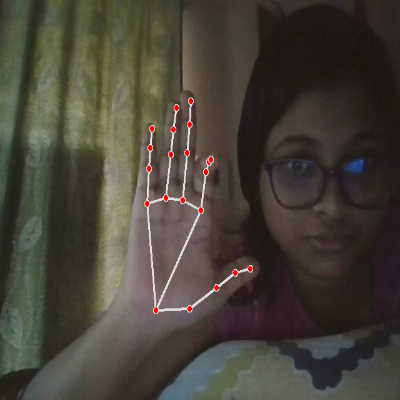

In [ ]:
# Mudra Finger Analysis + Hand Counting

from google.colab.patches import cv2_imshow

# Load an example image (replace this with your mudra photo)
# or capture from webcam in Colab (if allowed)
img_path = "/content/photo.jpg"  # <- replace with your image path
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create hands detector
with mp_hands.Hands(static_image_mode=True,
                    max_num_hands=2,
                    min_detection_confidence=0.5) as hands:

    results = hands.process(image_rgb)
    h, w, _ = image.shape

    # ✅ Count number of detected hands
    num_hands = len(results.multi_hand_landmarks) if results.multi_hand_landmarks else 0
    print(f"🖐️ Number of hands detected: {num_hands}")

    # If no hands, exit early
    if not results.multi_hand_landmarks:
        print("No hand detected!")
    else:
        for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
            print(f"\n👉 Hand #{hand_no + 1}")
            mp_draw.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Collect landmarks (normalized coordinates → pixel)
            landmarks = []
            for lm in hand_landmarks.landmark:
                landmarks.append((int(lm.x * w), int(lm.y * h)))

            # FINGER CONFIDENCE COMPUTATION
            def finger_angle(p1, p2, p3):
                """Return angle (in degrees) at p2 formed by p1–p2–p3"""
                a = np.array(p1)
                b = np.array(p2)
                c = np.array(p3)
                ba = a - b
                bc = c - b
                cos_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
                return np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))

            finger_joints = {
                "Thumb": [1, 2, 3, 4],
                "Index": [5, 6, 7, 8],
                "Middle": [9, 10, 11, 12],
                "Ring": [13, 14, 15, 16],
                "Little": [17, 18, 19, 20],
            }

            finger_scores = {}
            for name, idx in finger_joints.items():
              try:
                ang = finger_angle(landmarks[idx[0]], landmarks[idx[1]], landmarks[idx[2]])
                conf = angle_to_conf(ang)
                finger_scores[name] = round(conf, 2)
              except:
                finger_scores[name] = 0

            print("🔹 Finger confidence scores:")
            for f, c in finger_scores.items():
                print(f"  {f}: {c}%")

# Show the annotated hand
cv2_imshow(cv2.resize(image, (400, 400)))
